In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Introductory setup from previous 2 parts

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
sns.set(rc = {'figure.figsize':(11.7,8.27)})
cars_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarsSampled/cars_sampled.csv")
cars = cars_data.copy()

In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


**Removing Insignificant columns**

In [32]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis= 1)

cars.drop_duplicates(keep = 'first', inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


**Subsetting only the significant Data**

In [33]:
cars = cars[
    (cars["yearOfRegistration"] <= 2018)
    &(cars["yearOfRegistration"] >= 1950)
    &(cars["price"] >= 100)
    &(cars["price"] <= 150000)
    &(cars["powerPS"] >= 10)
    &(cars["powerPS"] <= 500)
]
# Approx 6700 records are dropped

In [34]:
cars['Age'] = (2018 - cars['yearOfRegistration']) + ((cars['monthOfRegistration'])/12)
cars["Age"] = round(cars["Age"], 2)
cars['Age'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [35]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'])

*Further Dropping insignificant variables*

In [36]:
cols = ['seller', 'offerType', 'abtest']
cars = cars.drop(columns = cols, axis = 1)
cars_copy = cars.copy()

In [37]:
cars_select1 = cars.select_dtypes(exclude = [object])
correlation = cars_select1.corr()
print(round(correlation,3))
print(cars_select1.corr().loc[:,'price'].abs().sort_values(ascending  = False))

           price  powerPS  kilometer    Age
price      1.000    0.575     -0.440 -0.336
powerPS    0.575    1.000     -0.016 -0.151
kilometer -0.440   -0.016      1.000  0.292
Age       -0.336   -0.151      0.292  1.000
price       1.000
powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64


## Actual code of this Session
We are going to build a linear regression and random forest regression model on 2 sets of data
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the misssing values

## ==== Omitting the missing values ====

In [38]:
cars_omit = cars.dropna(axis = 0)
# Approx 10000 records removed

#### converting categorical variables into dummy variables

In [39]:
cars_omit = pd.get_dummies(cars_omit, drop_first = True)

#### importing necessary libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
help()


Welcome to Python 3.8's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.8/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".

help> exit()
No Python documentation found for 'exit()'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.

help> quit

You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Ex

### ===== Building model with the omitted data =====
#### separating input and output variables

In [43]:
x1 = cars_omit.drop(['price'], axis= 1, inplace = False)
y1 = cars_omit['price']

#### plotting the variable price

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d5a0b6210>,
      dtype=object)

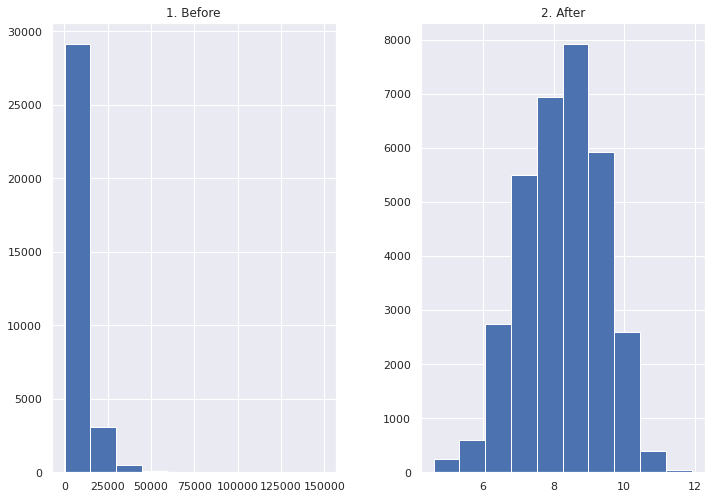

In [44]:
prices = pd.DataFrame({"1. Before": y1, "2. After": np.log(y1)})
prices.hist()

1. for histogram for log(prices)... it is nicely bell shaped
2. for histogram for simply prices... it is a skewed graph

so it is better to go further with natural log of prices and not just with price

So, we will be regressing the natural logarithm of prices with the input features

#### Transforming price as a Logarthmic value

In [45]:
y1 = np.log(y1)

#### Splitting the data into test and train

In [82]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 28)
print(X_train1.shape, X_test1.shape, Y_train1.shape, Y_test1.shape)

(26307, 300) (6577, 300) (26307,) (6577,)


### Baseline Model for the Omitted Data
In baseline model the predicted value is replaced by the mean value of the test data

We are making a base model by using test data mean value

This is to set a benchmark and to compare with our regression model

inshort... setting the base value (base metric)

#### finding mean for test data value

In [83]:
base_pred_1 = np.mean(Y_test1)
print(base_pred_1)

8.215867183883187


#### Repeating the same value till the length of test data

In [84]:
base_pred_1 = np.repeat(base_pred_1, len(Y_test1))

#### Finding RMSE (Root Mean Square Error)
1. it computes the difference between test value and predicted value .... squares them... and divides by the no. of observations
2. this is the mean squared error
3. when you take the squareroot of mean squared error... you get RMSE value

In [85]:
base_root_mean_square_error_1 = np.sqrt(mean_squared_error(Y_test1, base_pred_1))
print(base_root_mean_square_error_1)

1.1462960922879677


## Linear Regression with Omitted Data

#### Setting intercept as true

In [86]:
lgr = LinearRegression(fit_intercept = True)

#### model

In [87]:
model_lin1 = lgr.fit(X_train1, Y_train1)

In [88]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"Linear Regression Accuracy Score for training set (Omitting missing values): {r2_lin_train1}\n \
Linear Regression Accuracy Score for testing set (Omitting missing values): {r2_lin_test1}")

Linear Regression Accuracy Score for training set (Omitting missing values): 0.7765100771151832
 Linear Regression Accuracy Score for testing set (Omitting missing values): 0.7763292003344727


#### Predicting model on test set

In [89]:
cars_predictions_lin1 = lgr.predict(X_test1)

#### calculating MSE and RMSE for predictions

In [90]:
lin_mse1 = mean_squared_error(Y_test1, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.542127524003901


it should be noted that the RMSE valus has dropped from 1.14 to 0.54 (Approx 50% reduction)

#### R squared value
it helps to tell you how good is your model able to explain the variability in 'Y'

In [91]:
r2_lin_train1 = model_lin1.score(X_train1, Y_train1)
r2_lin_test1 = model_lin1.score(X_test1, Y_test1)
print(f"r2_lin1_train1: {r2_lin_train1}\nr2_lin1_test1: {r2_lin_test1}")

r2_lin1_train1: 0.7765100771151832
r2_lin1_test1: 0.7763292003344727


R sq. value for train set is 0.7765 and R sq. value for test set is 0.7763

cutting quite close... train set is definitely better... but the test set is not far behind

This tells that our model is good

As much as variability the model was able to capture in the train data...it is able to capture the same amount of variability (if not more) in the test data as well.

#### Regression diagnostics: Residual Plot analysis
Residual: difference between predicted value (cars_predictions_lin1) and actual value (Y_test)

Residual = Actual - Predicted

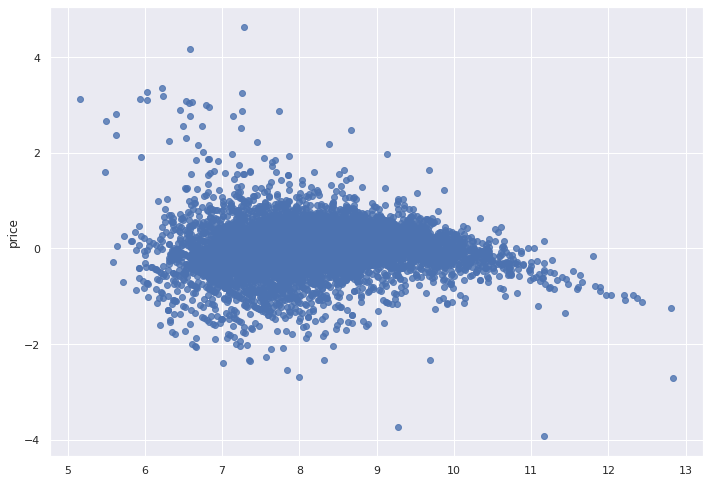

In [92]:
residuals = Y_test1 - cars_predictions_lin1
sns.regplot(x = cars_predictions_lin1, y= residuals, scatter = True, fit_reg= False)

In [93]:
residuals.describe()

count   6577.000
mean      -0.005
std        0.542
min       -3.921
25%       -0.273
50%        0.030
75%        0.289
max        4.629
Name: price, dtype: float64

## Random Forest regressor using omitted data
### Parameters


#### n_estimators: 'int' (def 100)
Number of trees in the forest
#### min_samples_split: 'int' or 'float' (def 2)
Minimum No. of samples required to split an internal node
#### min_samples_leaf: int or float (def 1)
Minimum No. of samples required to be at a leaf node. A split point will be considered only if it leaves at least (Min_samples_leaf) training samples in each of left and right branches

#### max_features: {'auto', 'sqrt', 'log'}, int, float  (def 'auto')
No. of features to be considered to build the model
1. if 'auto', then max_features = n_features (chooses the features automatically)
2. if 'sqrt', then max_features = sqrt(n_features)
3. if 'log', then max_features = log(n_features)
4. if int, then consider (int) features at each split

#### max_depth: int (def None)
The maximum depth of the tree. If None, nodes are expanded untill all leaves are pure or until all leaves contain less than min_samples_split

#### criterion: {'mse', 'mae'} (def: 'mse')
#### random_state: int
it is a predefined algorithm for randomizer.... if not specified, it will take different data sets everytime

In [60]:
rf = RandomForestRegressor(n_estimators = 100,
                          max_features = 'auto',
                          max_depth = 100,
                          min_samples_split = 10,
                          min_samples_leaf = 4,
                          random_state = 1)

#### model

In [61]:
model_rf1 = rf.fit(X_train1, Y_train1)

In [70]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"Random Forest Accuracy Score for training set (Omitting missing values): {r2_rf_train1}\n\
Random Forest Accuracy Score for testing set (Omitting missing values): {r2_rf_test1}")

Random Forest Accuracy Score for training set (Omitting missing values): 0.9202494705146291
Random Forest Accuracy Score for testing set (Omitting missing values): 0.8504018147750623


In [71]:
X_train1.columns

Index(['powerPS', 'kilometer', 'Age', 'vehicleType_cabrio',
       'vehicleType_coupe', 'vehicleType_limousine', 'vehicleType_others',
       'vehicleType_small car', 'vehicleType_station wagon', 'vehicleType_suv',
       ...
       'brand_seat', 'brand_skoda', 'brand_smart', 'brand_subaru',
       'brand_suzuki', 'brand_toyota', 'brand_trabant', 'brand_volkswagen',
       'brand_volvo', 'notRepairedDamage_yes'],
      dtype='object', length=300)

In [72]:
type(X_train1),type(X_test1), type(Y_train1), type(Y_test1)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

#### Predicting model on test set

In [73]:
cars_predictions_rf1 = rf.predict(X_test1)

#### Computing MSE and RMSE values

In [74]:
rf_mse1 = mean_squared_error(Y_test1, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


Thus, it should be noted that Random Forest model is performing better than the Linear regression model as the RMSE model has come down further

#### R squared value

In [95]:
r2_rf_train1 = model_rf1.score(X_train1, Y_train1)
r2_rf_test1 = model_rf1.score(X_test1, Y_test1)
print(f"r2_rf_train1: {r2_rf_train1}\nr2_lin1_test1: {r2_rf_test1}")

r2_rf_train1: 0.8982850042091305
r2_lin1_test1: 0.9042532741436633


#### Thus it should be noted that the random forest model is working better than linear regression model for the omitted data

#### Attributes of Random forest
1. feature_importances_ (ndarray of shape (n_features,)): The impurity-based feature importances.
Gives the % importance given to each column
2. n_features_in_ (int): Number of features seen during fit.
3. oob_score_ (float): Score of the training dataset obtained using an out-of-bag estimate. This attribute exists only when oob_score is True

# ===== Model building with imputed data =====

1. for Numerical variable, filling na values with median
2. for categorical variable, filling na values with modal value

In [76]:
cars_imputed = cars.apply(lambda x: x.fillna(x.median())
                         if (x.dtype == 'float' or x.dtype == 'int')
                         else x.fillna(x.value_counts().index[0]))

In [77]:
cars_imputed.isna().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

#### converting categorical variables into dummy variables

In [78]:
cars_imputed = pd.get_dummies(cars_imputed, drop_first = True)

#### separating input and output variables

In [79]:
x2 = cars_imputed.drop(['price'], axis= 1, inplace = False)
y2 = cars_imputed['price']

#### plotting the variable price


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d40be6790>,
      dtype=object)

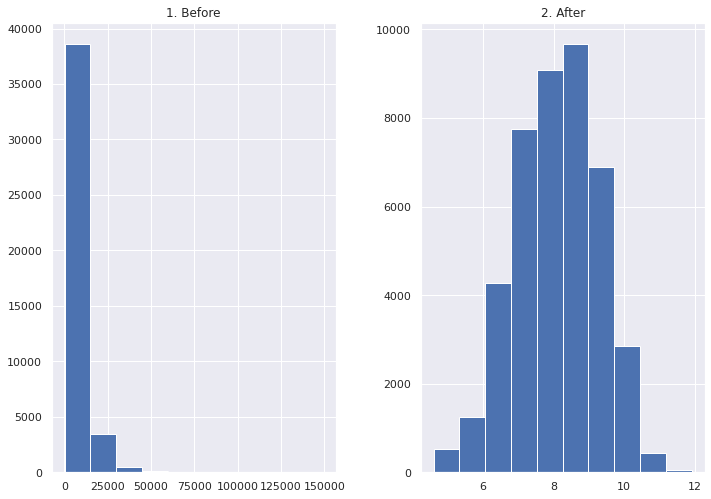

In [80]:
prices = pd.DataFrame({"1. Before": y2, "2. After": np.log(y2)})
prices.hist()

#### Transforming price as a Logarthmic value




In [81]:
y2 = np.log(y2)

#### Splitting the data into test and train

In [104]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 28)
print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape)

(34217, 303) (8555, 303) (34217,) (8555,)


#### finding mean for test data value


In [105]:
base_pred_2 = np.mean(Y_test2)
print(base_pred_2)

8.090174745275364


#### Repeating the same value till the length of test data

In [106]:
base_pred_2 = np.repeat(base_pred_2, len(Y_test2))

### Baseline Model for the imputed Data
#### Finding RMSE (Root Mean Square Error)

In [107]:
base_root_mean_square_error_2 = np.sqrt(mean_squared_error(Y_test2, base_pred_2))
print(base_root_mean_square_error_2)

1.1776696728811618


## Linear Regression with Imputed Data
#### Setting intercept as true

In [108]:
lgr = LinearRegression(fit_intercept = True)

#### model




In [109]:
model_lin2 = lgr.fit(X_train2, Y_train2)

In [110]:
r2_lin_train2 = model_lin2.score(X_train2, Y_train2)
r2_lin_test2 = model_lin2.score(X_test2, Y_test2)
print(f"Linear Regression Accuracy Score for training set (Imputing missing values): {r2_lin_train2}\n \
Linear Regression Accuracy Score for testing set (Imputing missing values): {r2_lin_test2}")

Linear Regression Accuracy Score for training set (Imputing missing values): 0.7051940884180551
 Linear Regression Accuracy Score for testing set (Imputing missing values): 0.7101981867565601


#### Predicting model on test set

In [111]:
cars_predictions_lin2 = lgr.predict(X_test2)

#### calculating MSE and RMSE for predictions


In [112]:
lin_mse2 = mean_squared_error(Y_test2, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.6339777855486982


So after imputing the data, the error has gone slightly up (from 0.5455 to 0.6483).... obviously, because we are imputing data which was not originally present

#### R squared value



In [114]:
r2_lin_train2 = model_lin2.score(X_train2, Y_train2)
r2_lin_test2 = model_lin2.score(X_test2, Y_test2)
print(f"r2_lin1_train2: {r2_lin_train2}\nr2_lin1_test2: {r2_lin_test2}")

r2_lin1_train2: 0.7051940884180551
r2_lin1_test2: 0.7101981867565601


## Random Forest regressor using imputed data

In [115]:
rf2 = RandomForestRegressor(n_estimators = 100,
                          max_features = 'auto',
                          max_depth = 100,
                          min_samples_split = 10,
                          min_samples_leaf = 4,
                          random_state = 1)

#### model






In [116]:
model_rf2 = rf2.fit(X_train2, Y_train2)

In [118]:
r2_rf_train2 = model_rf2.score(X_train2, Y_train2)
r2_rf_test2 = model_rf2.score(X_test2, Y_test2)
print(f"Random Forest Accuracy Score for training set (imputing missing values): {r2_rf_train2}\n\
Random Forest Accuracy Score for testing set (Imputing missing values): {r2_rf_test2}")

Random Forest Accuracy Score for training set (imputing missing values): 0.9012364302644356
Random Forest Accuracy Score for testing set (Imputing missing values): 0.8379832449110571


#### Predicting model on test set

In [119]:
cars_predictions_rf2 = rf2.predict(X_test2)

#### Computing MSE and RMSE values

In [120]:
rf_mse2 = mean_squared_error(Y_test2, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.47402741143915383


A lot less than the RMSE value given by linear regression model (for imputed data)

#### R squared value



In [121]:
r2_rf_train2 = model_rf2.score(X_train2, Y_train2)
r2_rf_test2 = model_rf2.score(X_test2, Y_test2)
print(f"r2_rf_train2: {r2_rf_train2}\nr2_lin1_test1: {r2_rf_test2}")

r2_rf_train2: 0.9012364302644356
r2_lin1_test1: 0.8379832449110571


#### For Imputed Data, RMSE value and R squared value drops (relative to omitted data) as we are imputing certain values that are not originally present

# FINAL OUTPUT

In [123]:
# FOR OMITTED DATA
print(f"Metrics for models built from data where missing values were omitted")
print(f"Base RMSE value = {base_root_mean_square_error_1}")
print(f"RMSE value for linear Regression model = {lin_rmse1}")
print(f"RMSE value for Random Forest model = {rf_rmse1}")
print(f"Accuracy Score for training set from linear regression = {r2_lin_train1}")
print(f"Accuracy Score for testing set from linear regression = {r2_lin_test1}")
print(f"Accuracy Score for training set from random forest regressor = {r2_rf_train1}")
print(f"Accuracy Score for testing set from random forest regressor = {r2_rf_test1}")

print("\n\n")
# FOR IMPUTED DATA
print(f"Metrics for models built from data where missing values were imputed")
print(f"Base RMSE value = {base_root_mean_square_error_2}")
print(f"RMSE value for linear Regression model = {lin_rmse2}")
print(f"RMSE value for Random Forest model = {rf_rmse2}")
print(f"Accuracy Score for training set from linear regression = {r2_lin_train2}")
print(f"Accuracy Score for testing set from linear regression = {r2_lin_test2}")
print(f"Accuracy Score for training set from random forest regressor = {r2_rf_train2}")
print(f"Accuracy Score for testing set from random forest regressor = {r2_rf_test2}")

Metrics for models built from data where missing values were omitted
Base RMSE value = 1.1462960922879677
RMSE value for linear Regression model = 0.542127524003901
RMSE value for Random Forest model = 0.4360736289370223
Accuracy Score for training set from linear regression = 0.7765100771151832
Accuracy Score for testing set from linear regression = 0.7763292003344727
Accuracy Score for training set from random forest regressor = 0.8982850042091305
Accuracy Score for testing set from random forest regressor = 0.9042532741436633



Metrics for models built from data where missing values were imputed
Base RMSE value = 1.1776696728811618
RMSE value for linear Regression model = 0.6339777855486982
RMSE value for Random Forest model = 0.47402741143915383
Accuracy Score for training set from linear regression = 0.7051940884180551
Accuracy Score for testing set from linear regression = 0.7101981867565601
Accuracy Score for training set from random forest regressor = 0.9012364302644356
Accura

#### ovrall (omitted and imputed data inclusive)... Random Forest model is better than linear regression model